# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Breast Cancer Diagnosis Model

The data set for this project was obtained from Kaggle. This dataset is divided into two main classes of tumors malign or benign. Each tumor is described using several features computed from digital images taken from a fine needle aspirate of a breast lump. These describes the characteristics of a cell nucleus in a three dimensional space.  The characteristics include radius, texture, perimeter, smoothness, compactness and concavity to name a few. 

The data consist of 357 benign tumors and 212 malignant tumors. The data consist of 30 features in which all them are numeric with the exception of the diagnosis feature. The feature called “id” does not provide value for the model since it represents a unique identifier. As a result, this feature will be dropped from the model. The target feature diagnosis has two values M for malign and B for benign. Such feature will be extracted and the remaining 28 features will be used for training and testing the model.


# Exploring the Data

In [370]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
tumorData = pd.read_csv("breast_cancer.csv")
print "Data read successfully!"

Data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many tumors we have information on, and learn about the malign and benign rate among these lumps. In the code cell below, you will need to compute the following:
- The total number of tumors, `nTumor`.
- The total number of features for tumor, `nFeature`.
- The number of those tumors that are benign, `nBening`.
- The number of those students that are malign, `nMalign`.

In [371]:
from IPython.display import display

# Calculate number of tumors
nTumor = tumorData.shape[0]

# Calculate number of features
nFeature = len(tumorData.columns) 

# Calculate the number of benign tumors
nBenign = tumorData[tumorData['diagnosis'] == 'B'].shape[0]

# Calculate the number of malign tumors
nMalign = len(tumorData[tumorData['diagnosis'] == 'M'])

# Calculate graduation rate
malignRate = float (nMalign) / nTumor * 100

# Print the results
print "Total number of Tumors: {}".format(nTumor)
print "Number of features: {}".format(nFeature)
print "Number of students who passed: {}".format(nBenign)
print "Number of students who failed: {}".format(nMalign)
print "Malign rate : {:.2f}%".format(malignRate)


Total number of Tumors: 569
Number of features: 33
Number of students who passed: 357
Number of students who failed: 212
Malign rate : 37.26%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [372]:
# Extract feature columns
feature = list(tumorData.columns[2:-1])

# Extract target column 'passed'
target = tumorData.columns[1] 

# Show the list of columns
print "Feature #{} columns:\n{}".format(len(feature), feature)
print "\nTarget column: {}".format(target)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = tumorData[feature]
y_all = tumorData[target]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature #30 columns:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Target column: diagnosis

Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        2

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [373]:
# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# KFold cross
k_fold = KFold(n_splits=5, random_state=20, shuffle=True)

# Set the number of training points
num_train = 455

# Set the number of testing points
num_test = X_all.shape[0] - num_train
test_size = num_test * 1.0 / X_all.shape[0]

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=test_size, random_state=20)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 455 samples.
Testing set has 114 samples.


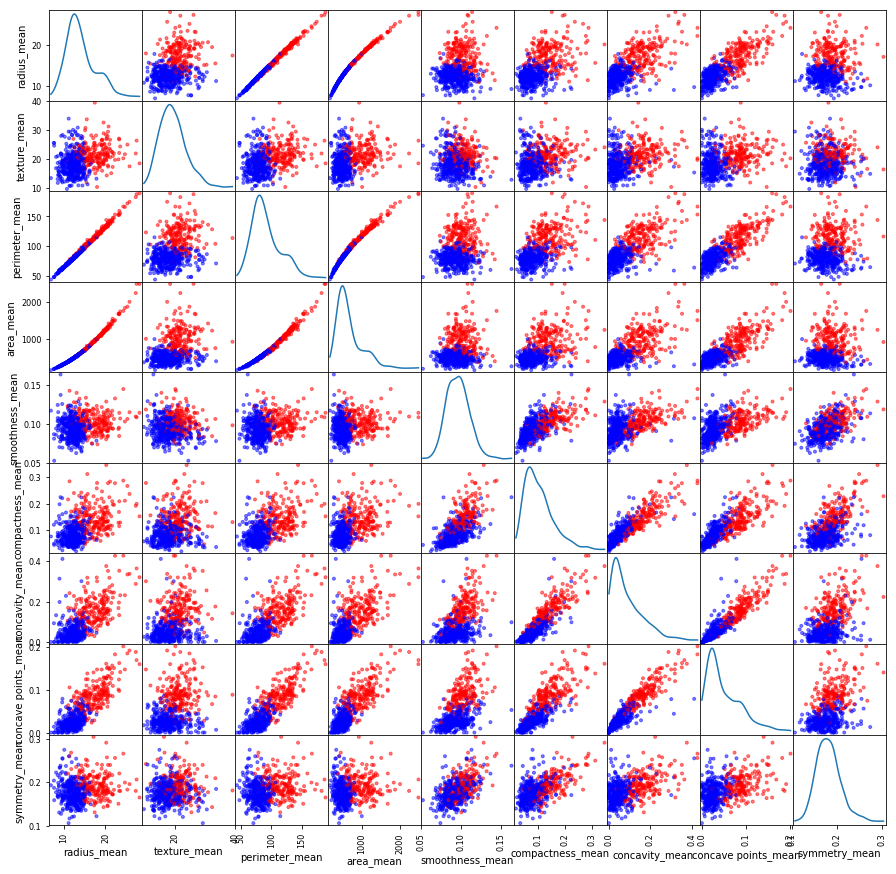

In [374]:
import matplotlib.pyplot as plt

color_function = {"B": "blue", "M": "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = tumorData["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column

# plotting scatter plot matrix
pd.scatter_matrix(tumorData[tumorData.columns[1:11]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()

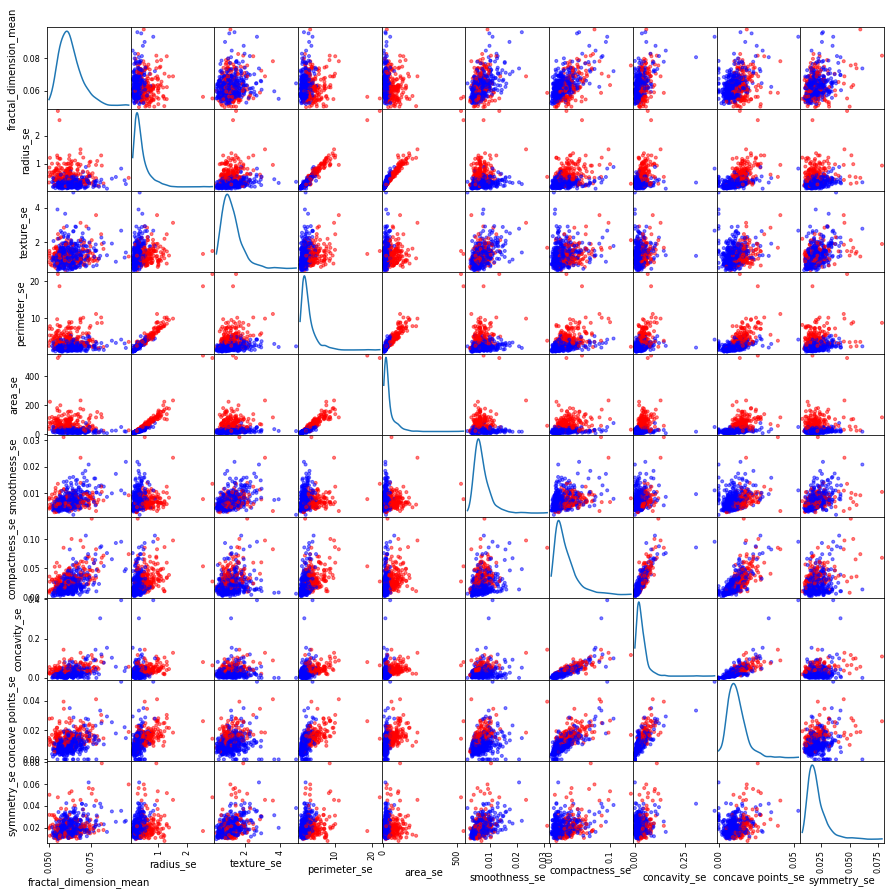

In [375]:
pd.scatter_matrix(tumorData[tumorData.columns[11:21]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()

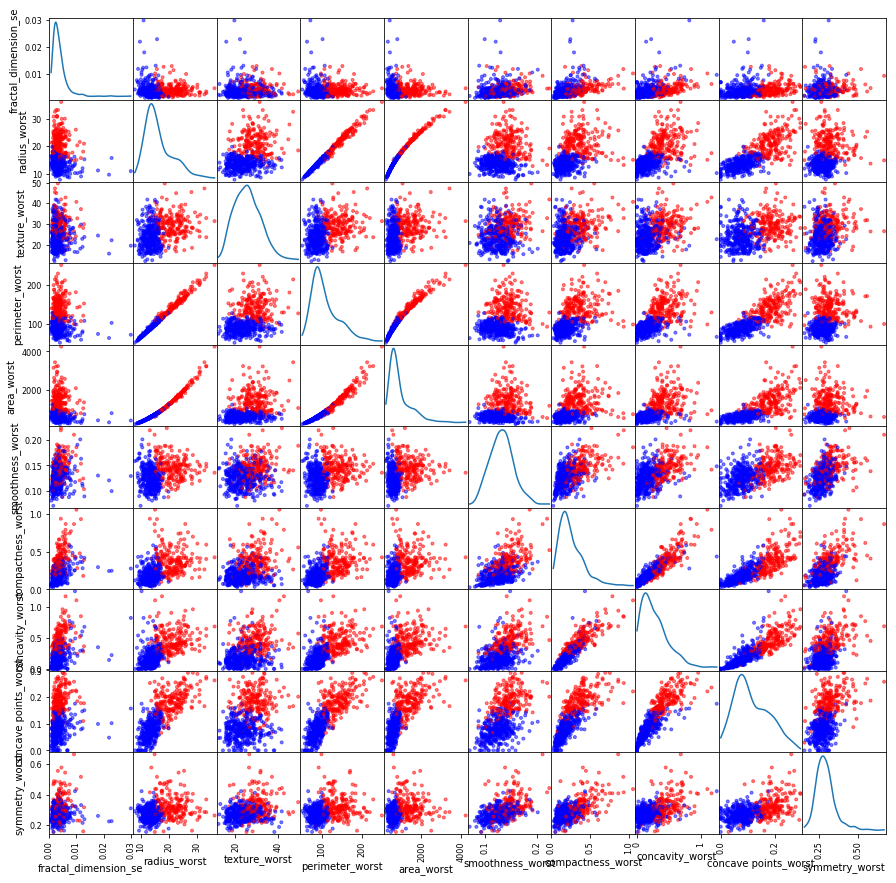

In [376]:
pd.scatter_matrix(tumorData[tumorData.columns[21:31]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.
In the code block below, you will need to implement the following:
Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

/home/edgar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


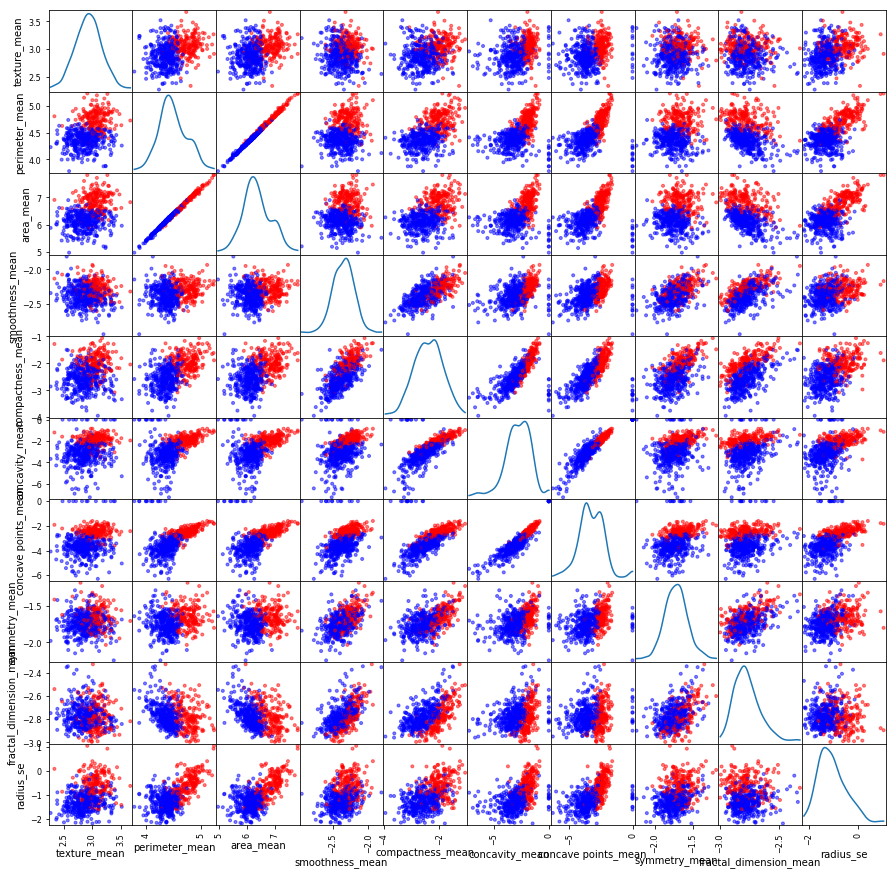

In [377]:
import numpy as np

# Scale the data using the natural logarithm
logData = np.log(X_all)
#print np.where(np.isnan(logData))
#print np.where(np.isinf(logData))
#print np.isnan(logData.values.any())
logData = logData.replace([np.inf, -np.inf], 0.0)
logData.fillna(0.0, inplace=True)

X_all = logData.copy(deep=True)
logData = pd.concat([logData, y_all], axis=1)
# mapping the color fuction with diagnosis column
colors = logData["diagnosis"].map(lambda x: color_function.get(x))

# plotting scatter plot matrix
pd.scatter_matrix(logData[logData.columns[1:11]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()


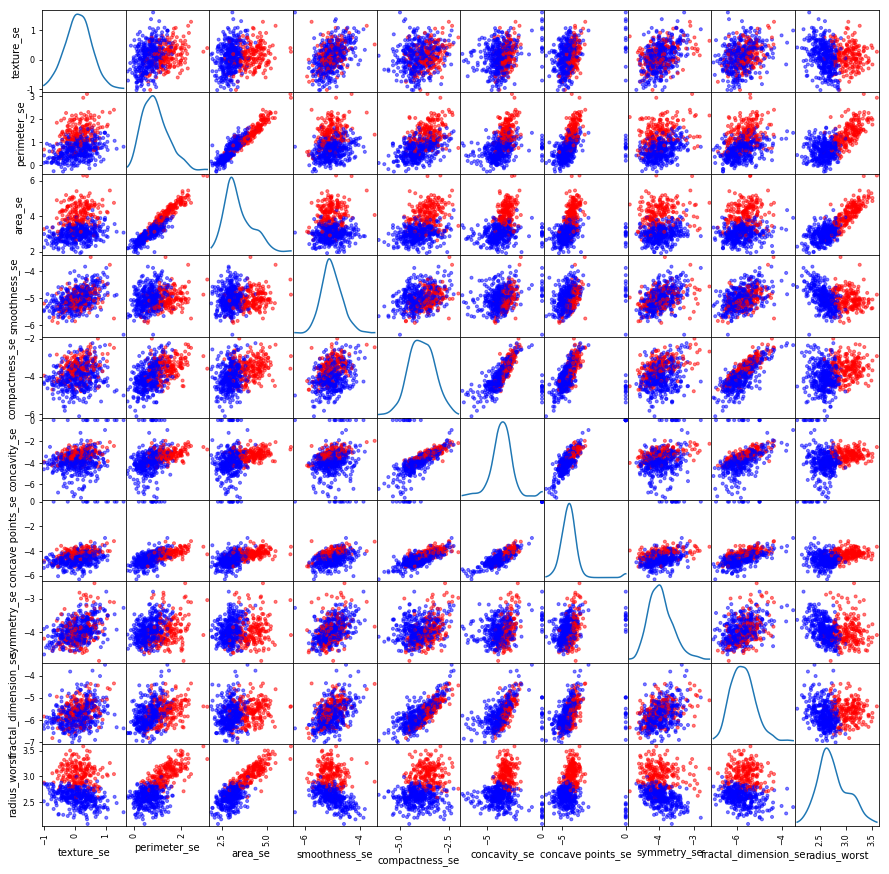

In [378]:
# plotting scatter plot matrix
pd.scatter_matrix(logData[logData.columns[11:21]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()

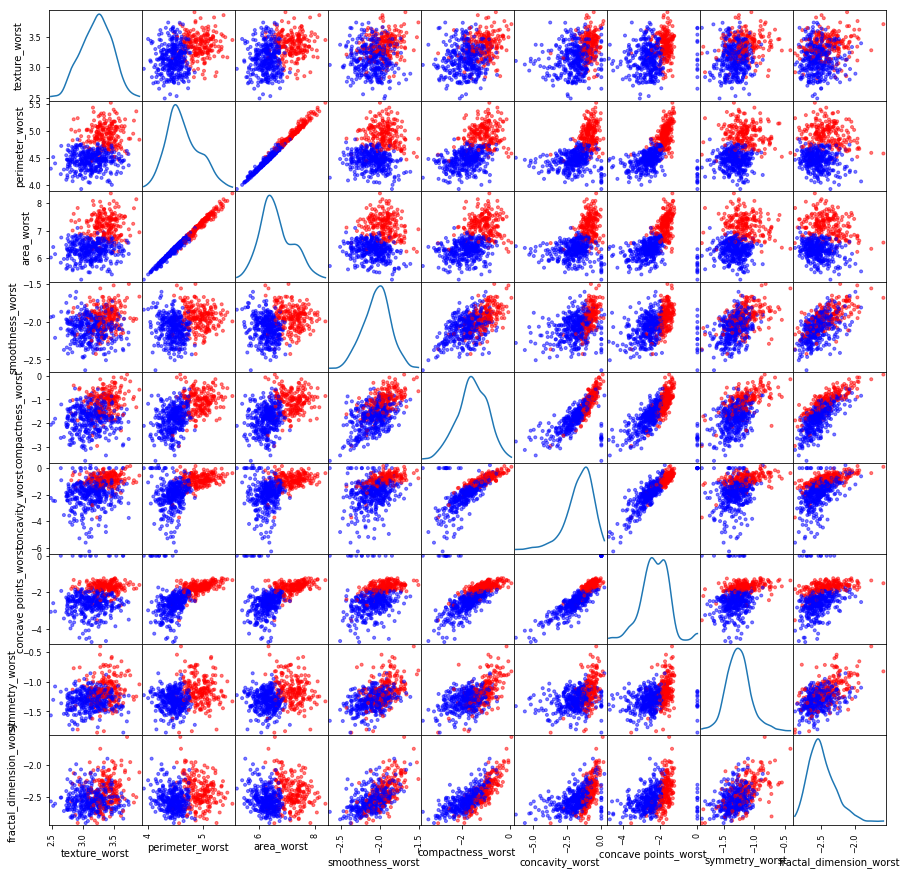

In [379]:
# plotting scatter plot matrix
pd.scatter_matrix(logData[logData.columns[21:31]], c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde')
plt.show()

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `data` to `pca`.
 

In [380]:
def pca_plot(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

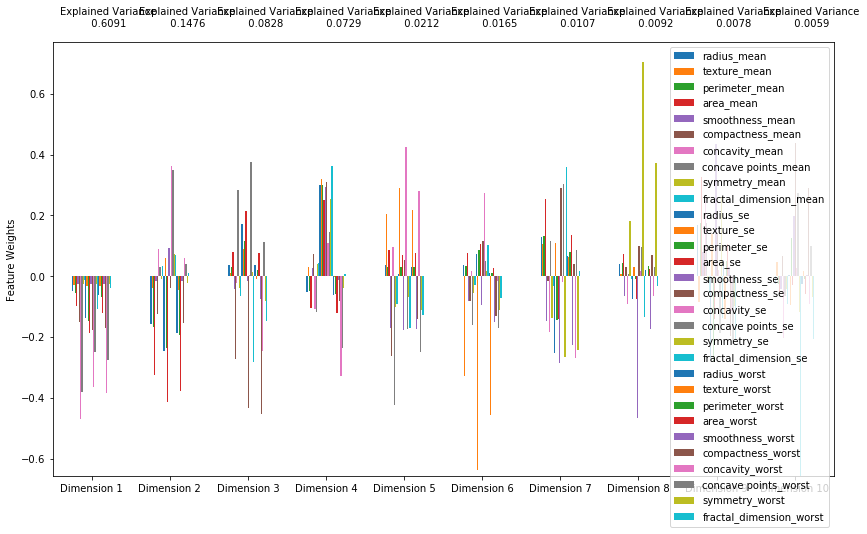

In [381]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=10)
pca.fit(X_all)

# Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_result = pca_plot(X_all, pca)
plt.show()

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `data` to `pca`.

In [382]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=7)
pca.fit(X_all)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(X_all)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4',
                                                    'Dimension 5', 'Dimension 6', 'Dimension 7'])

In [383]:
# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y_all, test_size=test_size, random_state=20)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 455 samples.
Testing set has 114 samples.


## Training and Evaluating Models
In this section, different supervised learning models that are appropriate will be used for this problem and available in `scikit-learn`. Then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. Finally three tables (one for each model) will be produce that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [384]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='M')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "\n"

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for the training set. 
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [385]:
# from sklearn import model_A
from sklearn.svm import SVC
# from sklearn import model_B
from sklearn.naive_bayes import GaussianNB
# from sklearn import model_C
from sklearn.tree import DecisionTreeClassifier
# from sklearn import model_D
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import model_E
from sklearn.ensemble import RandomForestClassifier

# Initialize the three models
randomState = 20
clf_A = SVC(random_state=randomState)
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier(random_state=randomState)
clf_D = KNeighborsClassifier()
clf_E = RandomForestClassifier(random_state=randomState)


# Execute the 'train_predict' function for each classifier and each training set size
classifiers = {"SVC" : clf_A, "GaussianNB" : clf_B, "DecisionTreeClassifier" : clf_C, "KNeighborsClassifier" : clf_D, 
               "RandomForestClassifier" : clf_E}
for clf in classifiers.keys() :
    train_predict(classifiers[clf], X_train, y_train, X_test, y_test)
    print "------------------------------------------------------------------------"

Training a RandomForestClassifier using a training set size of 455. . .
Trained model in 0.0519 seconds
Made predictions in 0.0075 seconds.
F1 score for training set: 0.9939.
Made predictions in 0.0059 seconds.
F1 score for test set: 0.9348.


------------------------------------------------------------------------
Training a GaussianNB using a training set size of 455. . .
Trained model in 0.0011 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.9097.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.9213.


------------------------------------------------------------------------
Training a SVC using a training set size of 455. . .
Trained model in 0.0033 seconds
Made predictions in 0.0022 seconds.
F1 score for training set: 0.9657.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.9677.


------------------------------------------------------------------------
Training a KNeighborsClassifier using a training set size of 455. . .
Trained mo

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

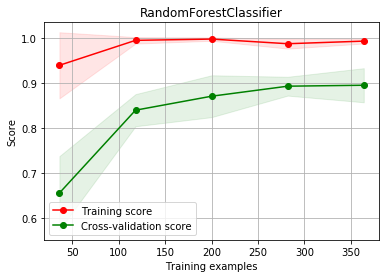

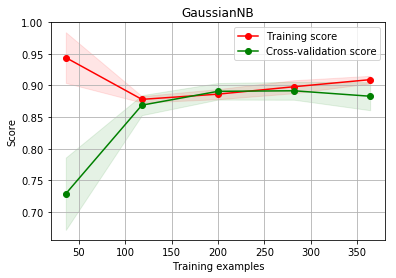

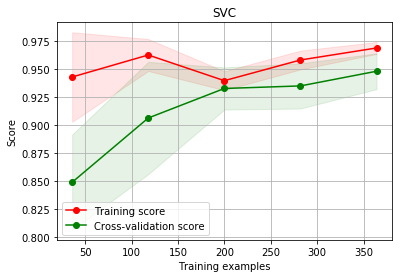

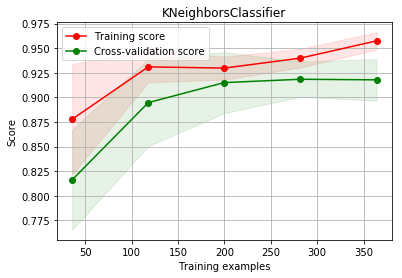

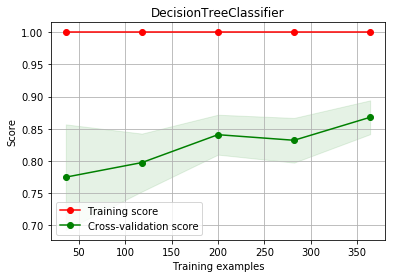

In [386]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scoring = make_scorer(f1_score, pos_label='M')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Cross validation iterations to get smoother mean test and train
for clf in classifiers.keys() :
    plot_learning_curve(classifiers[clf], clf, X_train, y_train, cv = k_fold)
plt.show()

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [387]:
# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='M')

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [388]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [389]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV

# Create the parameters list you wish to tune
parameters = [
  {'C': [0.5, 1, 10, 100, 110, 120, 130, 140], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
 ]

# Initialize the classifier
svc = SVC(random_state=7)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator = svc, param_grid = parameters, scoring = f1_scorer, cv = k_fold)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print grid_obj.best_params_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print " "
report(grid_obj.cv_results_)

{'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
Made predictions in 0.0013 seconds.
Tuned model has a training F1 score of 0.9627.
Made predictions in 0.0003 seconds.
Tuned model has a testing F1 score of 0.9897.
 
Model with rank: 1
Mean validation score: 0.956 (std: 0.018)
Parameters: {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}

Model with rank: 2
Mean validation score: 0.956 (std: 0.021)
Parameters: {'kernel': 'linear', 'C': 0.5}

Model with rank: 3
Mean validation score: 0.955 (std: 0.017)
Parameters: {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}



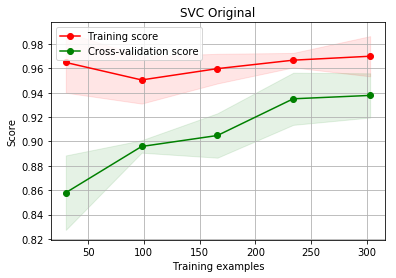

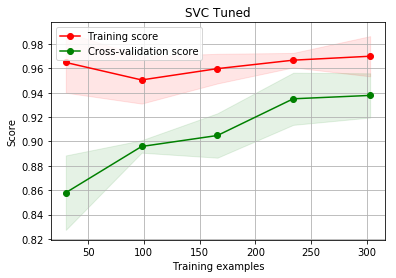

In [390]:
plot_learning_curve(clf_A, "SVC Original", X_train, y_train)
plot_learning_curve(svc, "SVC Tuned", X_train, y_train)
plt.show()

Confusion matrix, without normalization
[[65  1]
 [ 0 48]]
Normalized confusion matrix
[[ 0.9848  0.0152]
 [ 0.      1.    ]]


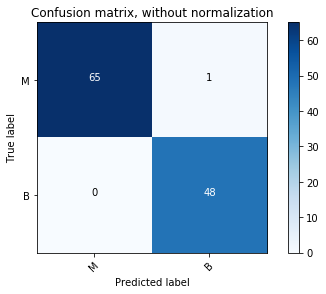

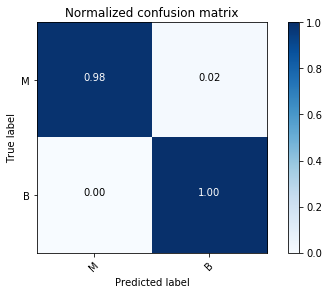

In [391]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
class_names = list(y_all.unique())

mtrx = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 4)

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, normalize = True, title='Normalized confusion matrix')

plt.show()

In [392]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV

# Create the parameters list you wish to tune
param_grid = {"max_depth": [3, None],
              "max_features": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 7, 11],
              "min_samples_leaf": [2, 3, 7, 11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Initialize the classifier
rfc = RandomForestClassifier(random_state=7, n_estimators=20)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring = f1_scorer, cv = k_fold)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print grid_obj.best_params_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print " "
report(grid_obj.cv_results_)

{'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}
Made predictions in 0.0116 seconds.
Tuned model has a training F1 score of 0.9753.
Made predictions in 0.0105 seconds.
Tuned model has a testing F1 score of 0.9895.
 
Model with rank: 1
Mean validation score: 0.915 (std: 0.026)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}

Model with rank: 1
Mean validation score: 0.915 (std: 0.026)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.913 (std: 0.024)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.913 (std: 0.024)
Parameters: {'bootstrap': True, 'min_sample

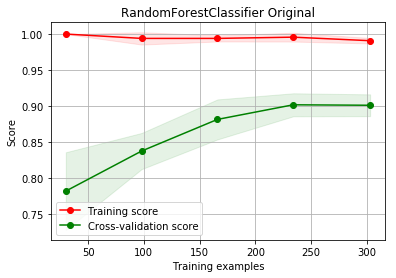

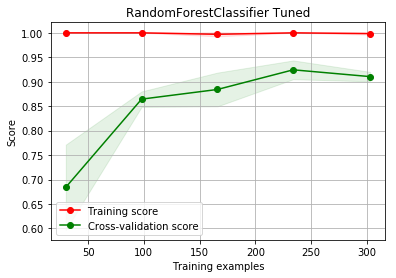

In [393]:
plot_learning_curve(clf_E, "RandomForestClassifier Original", X_train, y_train)
plot_learning_curve(rfc, "RandomForestClassifier Tuned", X_train, y_train)
plt.show()

Confusion matrix, without normalization
[[66  0]
 [ 1 47]]
Normalized confusion matrix
[[ 1.      0.    ]
 [ 0.0208  0.9792]]


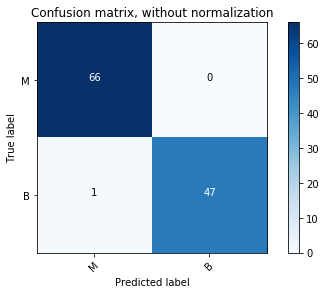

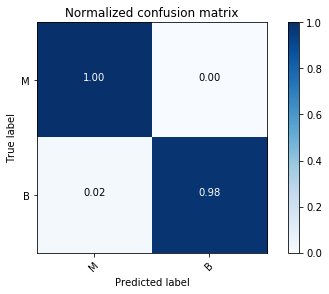

In [394]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
class_names = list(y_all.unique())

mtrx = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 4)

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(mtrx, classes=class_names, normalize = True, title='Normalized confusion matrix')

plt.show()